In [1]:
# importing our libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# reading the data
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
combine = [train, test] # make it easier to do operations on both dataframes

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
# Showing information about both dataframes in the list called combine
for data in combine:
    data.info()
    print('*'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [6]:
# lets take alook at the description of the numerical features
for data in combine:
    print(data.describe().transpose())
    print("*"*100)

             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  
****************************************************************************************************
             count         mean         std     min       25%        50%  

In [7]:
# lets take alook at the description of the categorical features (objects)
for data in combine:
    print(data.describe(include=[np.object]).transpose())
    print("*"*100)

         count unique                          top freq
Name       891    891  Christy, Miss. Julie Rachel    1
Sex        891      2                         male  577
Ticket     891    681                         1601    7
Cabin      204    147                  C23 C25 C27    4
Embarked   889      3                            S  644
****************************************************************************************************
         count unique                           top freq
Name       418    418  Ostby, Miss. Helene Ragnhild    1
Sex        418      2                          male  266
Ticket     418    363                      PC 17608    5
Cabin       91     76               B57 B59 B63 B66    3
Embarked   418      3                             S  270
****************************************************************************************************


**Analyze by pivoting Features**

In [8]:
train[['Pclass', 'Survived']].groupby(by='Pclass', as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [9]:
train[['Sex', 'Survived']].groupby(by='Sex', as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
train[['SibSp', 'Survived']].groupby(by='SibSp', as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [11]:
train[['Parch', 'Survived']].groupby(by='Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Visualizing data**

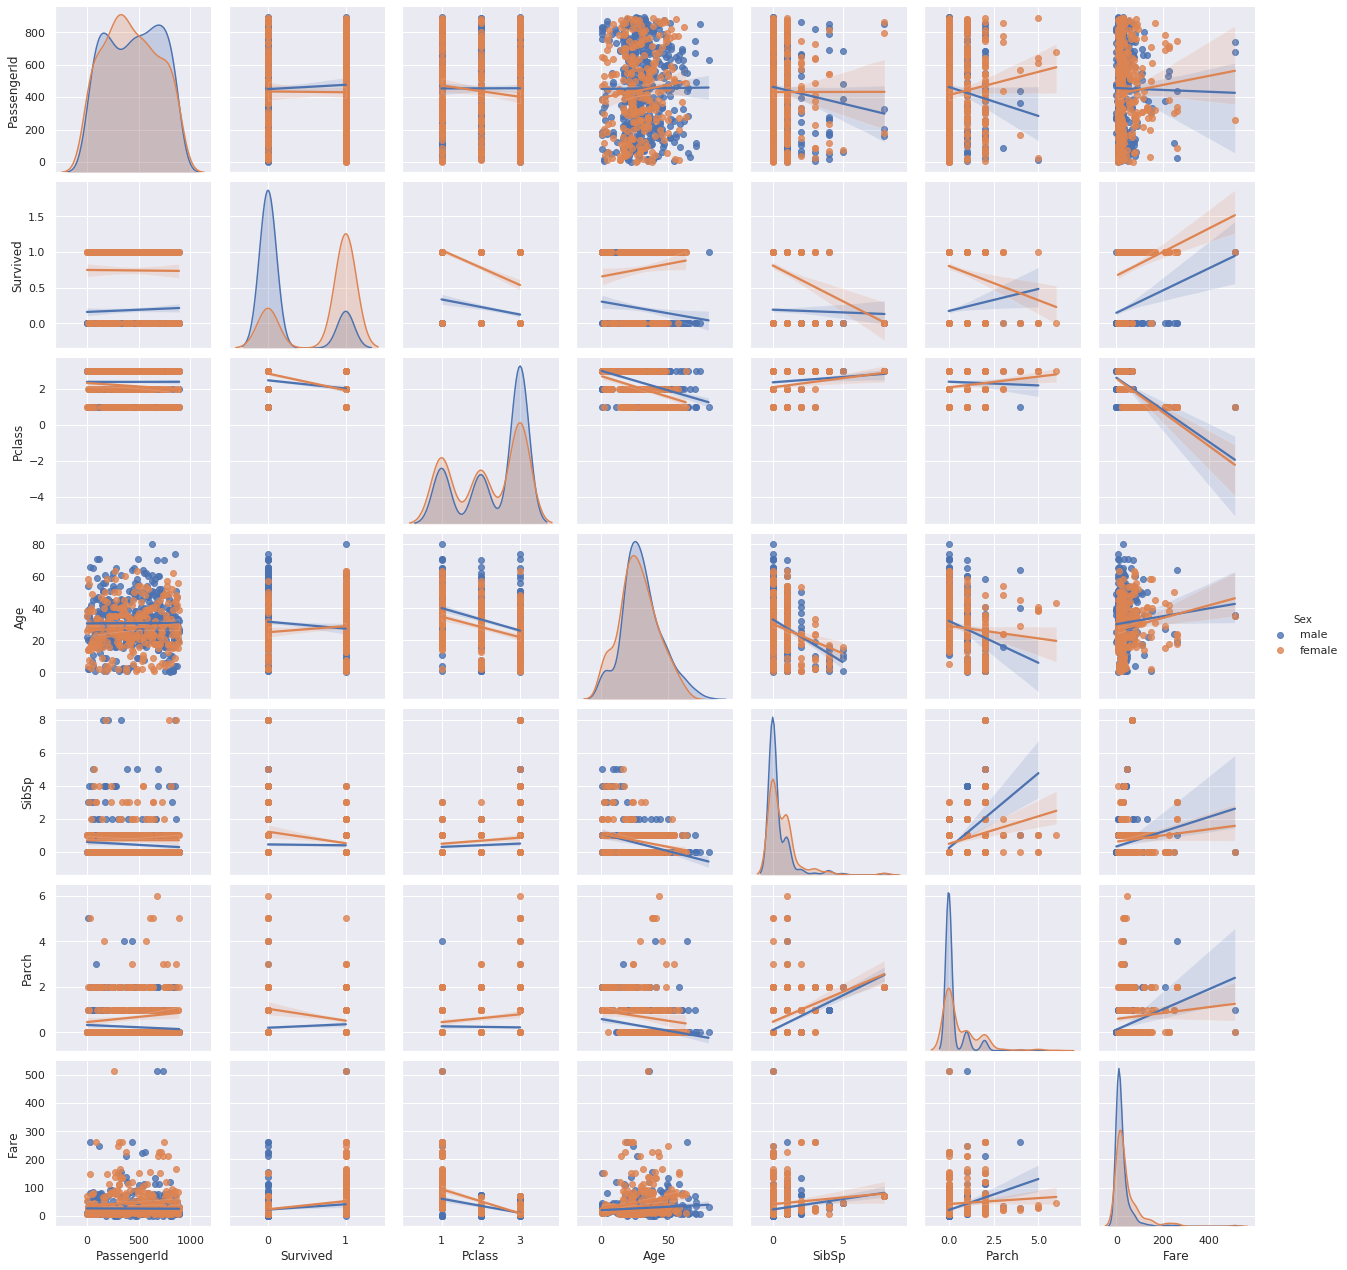

In [12]:
sns.pairplot(data=train, hue='Sex', kind='reg')

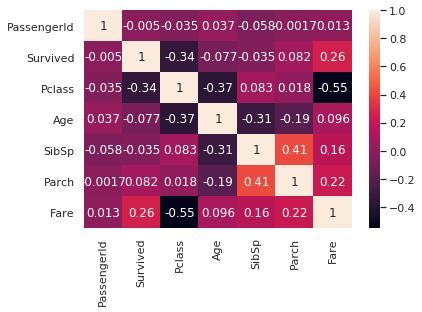

In [13]:
sns.heatmap(data=train.corr(), annot=True)

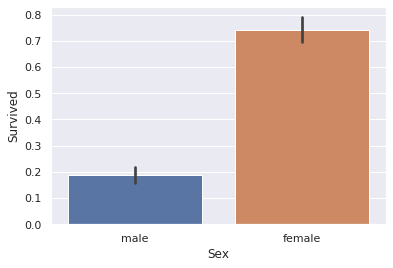

In [14]:
sns.barplot(x='Sex', y='Survived', data=train)

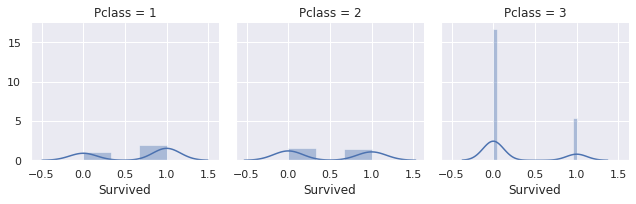

In [15]:
g = sns.FacetGrid(data=train, col='Pclass')
g.map(sns.distplot, 'Survived')

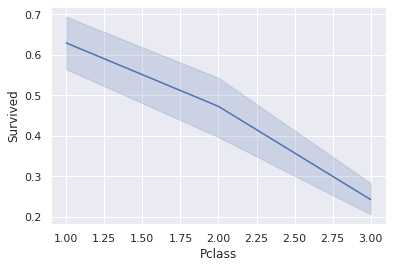

In [16]:
sns.lineplot(x='Pclass', y='Survived', data=train)
# by increasing the Pclass We notice that the Survival rete drop

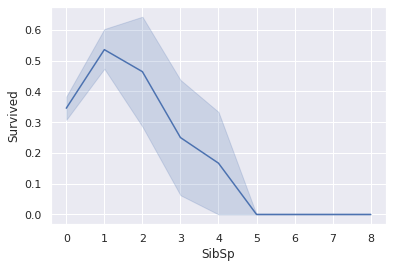

In [17]:
sns.lineplot(x='SibSp', y='Survived', data=train)

**Correction by dropping values**

In [18]:
# dropping the Ticket and Cabin columns from both of our datasets(train, test)
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine=[train, test]

In [19]:
train.columns.values # Notice that [Ticket, Cabin] are droped

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'], dtype=object)

In [20]:
test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'], dtype=object)

**Creating a new Features from existing one**

In [21]:
for data in combine:
    '''Creating a new column contain the title from the Name column'''
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [22]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Don           1
Mme           1
Countess      1
Ms            1
Capt          1
Lady          1
Sir           1
Name: Title, dtype: int64

In [23]:
# we can replace the rare ones with the word Rare
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [24]:
train.Title.value_counts() # Now we can see the Rare

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [25]:
# we also can convert the categorical titles to dummy variables using pandas
train_titles = pd.get_dummies(data=train['Title'], drop_first=True)
test_titles = pd.get_dummies(data=test['Title'], drop_first=True)
train = pd.concat([train, train_titles], axis=1)
test = pd.concat([test, test_titles], axis=1)
combine = [train, test]

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Miss,Mr,Mrs,Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0,1,0,0


In [27]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Miss,Mr,Mrs,Rare
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,Mr,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Rare,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Mr,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,Mr,0,1,0,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,22.3583,C,Master,0,0,0,0


In [28]:
# dropping the title column from each dataset
for data in combine:
    data.drop('Title', inplace=True, axis=1)

In [29]:
combine[1].head() # test dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Miss,Mr,Mrs,Rare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,0,1,0


In [30]:
# conveting the categorical Sex column to a dummy variables
train_sex = pd.get_dummies(data=train['Sex'], drop_first=True)
test_sex = pd.get_dummies(data=test['Sex'], drop_first=True)
train = pd.concat([train, train_sex], axis=1)
test = pd.concat([test, test_sex], axis=1)
combine = [train, test]

In [31]:
# dropping the Sex column
for data in combine:
    data.drop(labels=['Sex'], inplace=True, axis=1)

In [32]:
test.tail()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Miss,Mr,Mrs,Rare,male
413,1305,3,"Spector, Mr. Woolf",NaN,0,0,8.0500,S,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,108.9000,C,0,0,0,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,7.2500,S,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",NaN,0,0,8.0500,S,0,1,0,0,1
417,1309,3,"Peter, Master. Michael J",NaN,1,1,22.3583,C,0,0,0,0,1


**Filling the missing values in the column Age**

In [33]:
def impute_age_train(cols):
    """imputing the age column based on the Passenger Class"""
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass==1:
            return int(train[train['Pclass'] == 1]['Age'].mean())
        elif pclass==2:
            return int(train[train['Pclass'] == 2]['Age'].mean())
        elif pclass==3:
            return int(train[train['Pclass'] == 3]['Age'].mean())
    else:
        return age
    
def impute_age_test(cols):
    """imputing the age column based on the Passenger Class"""
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass==1:
            return int(test[test['Pclass'] == 1]['Age'].mean())
        elif pclass==2:
            return int(test[test['Pclass'] == 2]['Age'].mean())
        elif pclass==3:
            return int(test[test['Pclass'] == 3]['Age'].mean())
    else:
        return age
    
train['Age'] = train[['Age', 'Pclass']].apply(impute_age_train, axis=1)
test['Age'] = test[['Age', 'Pclass']].apply(impute_age_test, axis=1)
combine = [train, test]

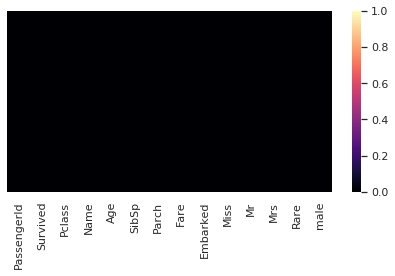

In [34]:
sns.heatmap(data=train.isnull(), cmap='magma', yticklabels=False)
plt.tight_layout()

In [35]:
train.isnull().sum() # we have two null values in Embarked column so we can drop them

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Miss           0
Mr             0
Mrs            0
Rare           0
male           0
dtype: int64

In [36]:
train.dropna(inplace=True, axis=0, how='any')
test.dropna(inplace=True, axis=0, how='any')

In [37]:
print(train.isnull().sum())
print('*'*100)
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Miss           0
Mr             0
Mrs            0
Rare           0
male           0
dtype: int64
****************************************************************************************************
PassengerId    0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Miss           0
Mr             0
Mrs            0
Rare           0
male           0
dtype: int64


In [38]:
# we dont need the Name column anymore so We can drop it
train = train.drop(labels=['Name'], axis=1)
test = test.drop(labels=['Name'], axis=1)
combine = [train, test]

In [39]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Miss,Mr,Mrs,Rare,male
0,1,0,3,22.0,1,0,7.2500,S,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,C,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,S,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,S,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,S,0,1,0,0,1


In [40]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [41]:
# getting dummy varibles from the Embarked column
train_embark = pd.get_dummies(data=train['Embarked'], drop_first=True)
test_embark = pd.get_dummies(data=test['Embarked'], drop_first=True)
train = pd.concat([train, train_embark], axis=1)
test = pd.concat([test, test_embark], axis=1)
combine = [train, test]

In [42]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Miss,Mr,Mrs,Rare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,S,0,1,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,C,0,0,1,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,S,1,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,S,0,0,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,S,0,1,0,0,1,0,1


In [44]:
# dropping the Embarked column now
for data in combine:
    data.drop('Embarked', inplace=True, axis=1)

In [45]:
test.tail()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Miss,Mr,Mrs,Rare,male,Q,S
413,1305,3,24.0,0,0,8.0500,0,1,0,0,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0,1,0,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1,0,1
416,1308,3,24.0,0,0,8.0500,0,1,0,0,1,0,1
417,1309,3,24.0,1,1,22.3583,0,0,0,0,1,0,0


In [46]:
combine[0].tail() # training dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Miss,Mr,Mrs,Rare,male,Q,S
886,887,0,2,27.0,0,0,13.00,0,0,0,1,1,0,1
887,888,1,1,19.0,0,0,30.00,1,0,0,0,0,0,1
888,889,0,3,25.0,1,2,23.45,1,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.00,0,1,0,0,1,0,0
890,891,0,3,32.0,0,0,7.75,0,1,0,0,1,1,0


In [ ]:
# dropping the passengerId column as it is not important (does not affect the Survival prediction)
for data in combine:
    data.drop('PassengerId', inplace=True, axis=1)

In [49]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Miss,Mr,Mrs,Rare,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,1


In [50]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Miss,Mr,Mrs,Rare,male,Q,S
0,3,34.5,0,0,7.8292,0,1,0,0,1,1,0
1,3,47.0,1,0,7.0000,0,0,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,1,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,1,0,0,0,1


**Splitting the data to x_train, x_test ,y_test and y_train**

In [51]:
x_train = train.drop('Survived', axis=1) 
y_train = train['Survived']
x_test = test

**Creating and training our logestic regression model**

In [53]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000000)
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
predictions = log_reg.predict(x_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [56]:
accuracy = log_reg.score(x_train, y_train)
accuracy

0.8267716535433071

**Using only the training dataset**

In [57]:
from sklearn.model_selection import train_test_split
x = train.drop('Survived', axis=1)
y = train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [59]:
reg = LogisticRegression(max_iter=10000)
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
pred = reg.predict(x_test)
acc = reg.score(x_test, y_test)
print('Accuracy is : ', acc )

Accuracy is :  0.8164794007490637


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_pred = pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       172
           1       0.76      0.72      0.74        95

    accuracy                           0.82       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.82      0.82       267



In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=pred))

[[150  22]
 [ 27  68]]


In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true=y_test, y_pred=pred))

0.8164794007490637
